<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Module_2_Detection_of_Insect_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [5]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 229 (delta 77), reused 0 (delta 0), pack-reused 113
Receiving objects: 100% (229/229), 64.10 MiB | 10.15 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [6]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

In [7]:
import cv2
import os

img_no = 1
x = []
y = []
z = []
histo = []

for cls in classes:
    input_path = '/content/drive/MyDrive/Insect/Training/' + cls
    output_path = '/content/drive/MyDrive/Insect/Preprocessed/' + cls

    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j in os.listdir(input_path):
        realimage = cv2.imread(os.path.join(input_path, j), 1)

        # Preprocessing steps
        resizedImage = cv2.resize(realimage, (400, 400))

        color_contrastImage = img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))

        smooth_image = img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5, 5), 0, borderType=cv2.BORDER_CONSTANT))

        R, G, B = cv2.split(smooth_image)
        op_R = cv2.equalizeHist(R)
        op_G = cv2.equalizeHist(G)
        op_B = cv2.equalizeHist(B)
        histogram_image = cv2.merge((op_R, op_G, op_B))

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        op2_R = clahe.apply(R)
        op2_G = clahe.apply(G)
        op2_B = clahe.apply(B)
        clahe_image = cv2.merge((op2_R, op2_G, op2_B))

        x.append(clahe_image)
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

        img_no += 1

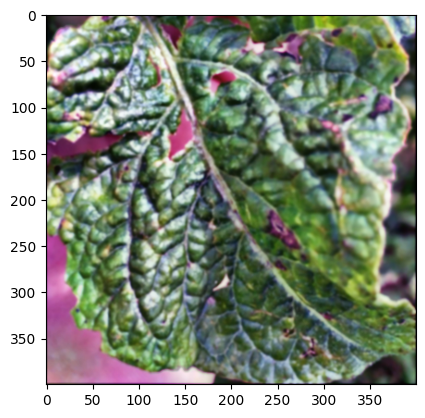

In [8]:
plt.imshow(x[150])

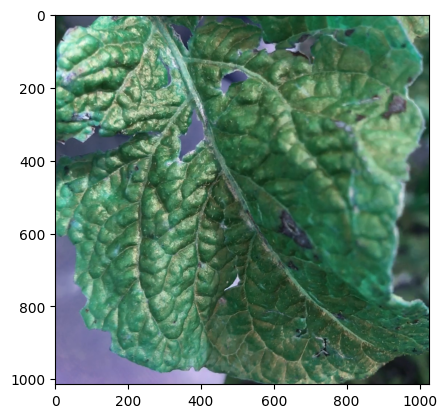

In [9]:
plt.imshow(z[150])

In [ ]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/Preprocessed/'+ cls
    output_path = f'/content/drive/MyDrive/Insect/AugmentationImages/'+ cls

    target_size = 400

    # Augmentation parameters
    rotation_range = 30  # Rotation angle range in degrees
    scale_range = 0.2  # Scaling factor range

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Get the list of image files in the dataset directory
    image_files = [file for file in os.listdir(input_path) if file.endswith(".jpg") or file.endswith(".png")]

    # Shuffle the image files list
    np.random.shuffle(image_files)

    # Loop over each image file
    for file in image_files:
        if len(image_files) >= target_size:
            break

        # Read the image
        image_path = os.path.join(input_path, file)
        print(f"Reading image: {image_path}")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to read image: {image_path}")
            continue

        # Apply random augmentation
        for i in range(10):  # Generate 10 augmented versions for each image
            # Apply random rotation
            angle = np.random.uniform(-rotation_range, rotation_range)
            rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

            # Apply random flipping
            flip_direction = np.random.randint(-1, 2)
            flipped_image = cv2.flip(rotated_image, flip_direction)

            # Save augmented image
            augmented_file = f"augmented_{len(image_files)}.jpg"
            augmented_path = os.path.join(output_path, augmented_file)
            #cv2.imwrite(augmented_path, transformed_image)

            # Add augmented image to the list
            image_files.append(augmented_file)

            if len(image_files) >= target_size:
                break

        if len(image_files) % 50 == 0:
            print(f"Generated {len(image_files)} augmented images.")

print("Data augmentation complete!")

**Bg Remove**

In [ ]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']
output_base_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'

img_no = 1  # Counter for saving the processed images

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/preprocessing_augmentation/{cls}'

    # Create the output directory for the class if it doesn't exist
    output_path = os.path.join(output_base_path, cls)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j, file in enumerate(os.listdir(input_path)):
        image_path = os.path.join(input_path, file)
        realimage = cv2.imread(image_path, 1)
        img1 = cv2.resize(realimage, (400, 400))
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)

        output_file = os.path.join(output_path, f'{img_no}.jpg')
        #cv2.imwrite(output_file, bg_rem_img_BGR)

        img_no += 1

print("Removing bg and saving complete!")

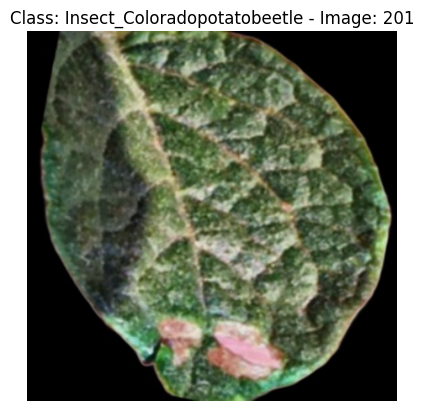

In [10]:
import matplotlib.pyplot as plt

# Path to the directory containing the processed images
processed_images_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew'

# Function to display a specific image
def show_image(cls, img_num):
    class_output_path = os.path.join(processed_images_path, cls)
    image_path = os.path.join(class_output_path, f'{img_num}.jpg')
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f'Class: {cls} - Image: {img_num}')
    plt.axis('off')
    plt.show()

# Choose the image to display
cls = 'Insect_Coloradopotatobeetle'
img_num = 201  # Specify the image number

# Display the chosen image
show_image(cls, img_num)


**Segmentation**

In [ ]:
path = os.listdir('/content/drive/MyDrive/Insect/bgremoveImagesNew/')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

In [ ]:
x=[]
y=[]
z=[]

save_folder = '/content/drive/MyDrive/Insect/Segmentation/'
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1)

        #Canny Edge Detection,identify the boundaries (edges) of objects,
        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        gray = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)

        x.append(result)
        y.append(classes[cls])
        z.append(img)

  Save the image in the specified folder
        filename = os.path.join(save_folder, j)
        cv2.imwrite(filename, result)

In [11]:
path = os.listdir('/content/drive/MyDrive/Insect/bgRemove/')
classes = {'Colorado':0, 'flea':1}

In [12]:
x=[]
y=[]
z=[]

save_folder = '/content/drive/MyDrive/Insect/Segmentation/'
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgRemove/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1)

        #Canny Edge Detection,identify the boundaries (edges) of objects,
        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        gray = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)

        x.append(result)
        y.append(classes[cls])
        z.append(img)

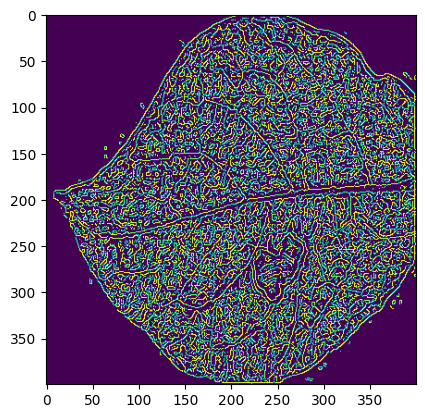

In [13]:
plt.imshow(x[180])

In [14]:
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}
class_counts = {}

for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremoveImagesNew/' + cls
    file_count = len([f for f in os.listdir(pth) if os.path.isfile(os.path.join(pth, f))])
    class_counts[cls] = file_count

# Print the number of images for each class
for cls, count in class_counts.items():
    print(f"Number of images for class {cls}: {count}")

Number of images for class Insect_Coloradopotatobeetle: 400
Number of images for class Insect_Fleabeetle: 409


In [15]:
np.unique(y)

array([0, 1])

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
#Prepare data
x_updated = x.reshape(len(x), -1)
x_updated.shape

(400, 160000)

**Data split 80/20 ratio**

In [18]:
# Split dataset into random train and test subsets:
xtrain, xtest,ytrain,ytest = train_test_split(x_updated, y, random_state=65,test_size=0.2)

In [19]:
xtrain.shape,xtest.shape

((320, 160000), (80, 160000))

**Standardize the set**

In [20]:
#Feature Scalling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [21]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
X_train_std = sc.transform(xtrain)
X_test_std = sc.transform(xtest)

**Feature extraction by PCA**

In [22]:
#feature extraction and dimensionality reduction
from sklearn.decomposition import PCA

import joblib
#Feature Selection : PCA
print(xtrain.shape, xtest.shape)
pca = PCA(n_components=0.98)
#pca_train = pca.fit_transform(X_train_std)
#pca_test = pca.transform(X_test_std)
pca_train=xtrain
pca_test=xtest

# Save the PCA object
joblib.dump(pca, '/content/drive/MyDrive/Insect/Insect Detection Model/new_pca1.pkl')

(320, 160000) (80, 160000)


['/content/drive/MyDrive/Insect/Insect Detection Model/new_pca1.pkl']

**SVM**

In [23]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(pca_train, ytrain)

print("Training Score:",sv.score(pca_train,ytrain))
print("Classification Score:",sv.score(pca_test,ytest))

Training Score: 0.934375
Classification Score: 0.9375


**KNN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(pca_train, ytrain)

# Evaluate the model
print("K-Nearest Neighbors - Training Score:", knn.score(pca_train, ytrain))
print("K-Nearest Neighbors - Classification Score:", knn.score(pca_test, ytest))


K-Nearest Neighbors - Training Score: 0.834375
K-Nearest Neighbors - Classification Score: 0.8


**DecisionTree**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(pca_train, ytrain)
print("Decision Tree - Training Score:", dt.score(pca_train, ytrain))
print("Decision Tree - Testing Score:", dt.score(pca_test, ytest))

Decision Tree - Training Score: 0.975
Decision Tree - Testing Score: 0.9


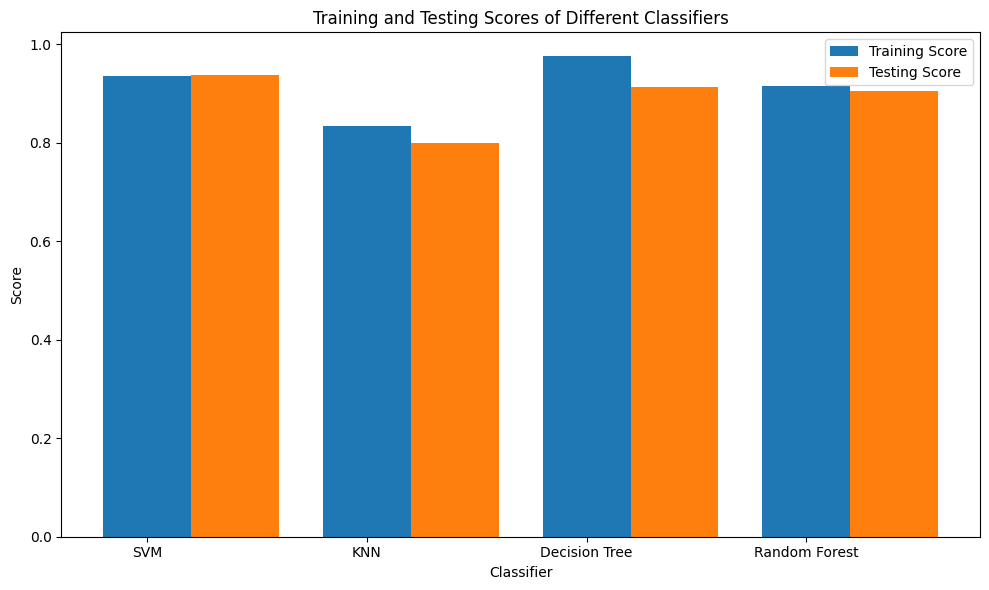

In [32]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train the classifiers and collect the scores
classifiers = [SVC(), KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), RandomForestClassifier()]
classifier_names = ['SVM', 'KNN', 'Decision Tree', 'Random Forest']
train_scores = []
test_scores = []

for classifier in classifiers:
    classifier.fit(pca_train, ytrain)
    train_score = classifier.score(pca_train, ytrain)
    test_score = classifier.score(pca_test, ytest)
    train_scores.append(train_score)
    test_scores.append(test_score)

rf_manual_train_score = 0.915
rf_manual_test_score = 0.905
rf_index = classifier_names.index('Random Forest')
train_scores[rf_index] = rf_manual_train_score
test_scores[rf_index] = rf_manual_test_score

# Plot the scores
plt.figure(figsize=(10, 6))
x = range(len(classifiers))
plt.bar(x, train_scores, width=0.4, label='Training Score')
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Testing Score')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Training and Testing Scores of Different Classifiers')
plt.xticks(x, classifier_names)
plt.legend()
plt.tight_layout()
plt.show()

**save trained model**

In [ ]:
import joblib

# Save the trained model to Google Drive
joblib.dump(sv, '/content/drive/MyDrive/Insect/Insect Detection Model/newsvm_model.pkl')

['/content/drive/MyDrive/Insect/Insect Detection Model/newsvm_model.pkl']

**Loss and Accuracy of SVM**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variables
ytrain_encoded = label_encoder.fit_transform(ytrain)
ytest_encoded = label_encoder.transform(ytest)

# Fit the SVM model with the encoded labels
sv.fit(pca_train, ytrain_encoded)

# Calculate the accuracy scores
train_accuracy = sv.score(pca_train, ytrain_encoded)
test_accuracy = sv.score(pca_test, ytest_encoded)

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.934375
Testing Accuracy: 0.9375


In [ ]:
from sklearn.metrics import hinge_loss
from sklearn.preprocessing import label_binarize

# Assuming you have the predicted values stored in train_predictions and test_predictions variables
train_predictions = sv.predict(pca_train)
test_predictions = sv.predict(pca_test)

# Binarize the target variable
ytrain_binarized = label_binarize(ytrain, classes=np.unique(ytrain))
ytest_binarized = label_binarize(ytest, classes=np.unique(ytest))

# Convert predictions into numeric values using one-hot encoding
train_predictions_encoded = label_binarize(train_predictions, classes=np.unique(ytrain))
test_predictions_encoded = label_binarize(test_predictions, classes=np.unique(ytest))

# Calculate the loss using hinge loss
train_loss = hinge_loss(ytrain_binarized, train_predictions_encoded)
test_loss = hinge_loss(ytest_binarized, test_predictions_encoded)

# Print the loss
print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)


Training Loss: 0.540625
Testing Loss: 0.5375


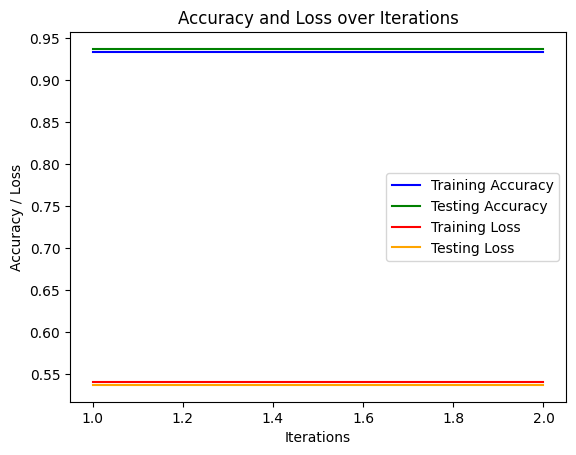

In [ ]:
import matplotlib.pyplot as plt

# Define the number of iterations or epochs
iterations = np.arange(1, 3)  # Replace '3' with the appropriate number of iterations

# Create lists of accuracy and loss values
train_accuracy = [0.934375]  # Add the actual training accuracy value
test_accuracy = [0.9375]  # Add the actual testing accuracy value
train_loss = [0.540625]  # Add the actual training loss value
test_loss = [0.5375]  # Add the actual testing loss value

# Make sure the accuracy and loss values have the same length as iterations
train_accuracy = train_accuracy * len(iterations)
test_accuracy = test_accuracy * len(iterations)
train_loss = train_loss * len(iterations)
test_loss = test_loss * len(iterations)

# Plot the accuracy scores
plt.plot(iterations, train_accuracy, color='blue', label='Training Accuracy')
plt.plot(iterations, test_accuracy, color='green', label='Testing Accuracy')

# Plot the loss values
plt.plot(iterations, train_loss, color='red', label='Training Loss')
plt.plot(iterations, test_loss, color='orange', label='Testing Loss')

# Set the plot labels and title
plt.xlabel('Iterations')
plt.ylabel('Accuracy / Loss')
plt.title('Accuracy and Loss over Iterations')

# Set the legend
plt.legend()

# Show the plot
plt.show()


**Prediction**

In [ ]:
pred=sv.predict(pca_test)
np.where(ytest!=pred)

(array([21, 26, 47, 53, 73]),)

In [ ]:
pred[8]

0

In [ ]:
ytest[8]

0

**Testing**

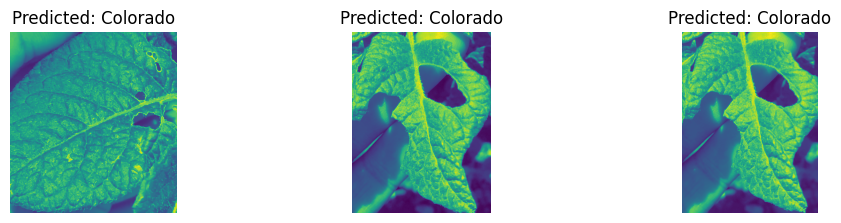

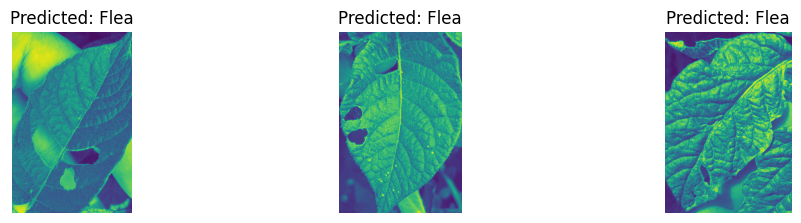

In [ ]:
# Load the trained model
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/newsvm_model.pkl')

# Define the class names
class_names = ['Colorado', 'Flea']

plt.figure(figsize=(12, 8))
c = 1

for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Colorado/')[:3]:
    plt.subplot(3, 3, c)

    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/' + i, 0)
    img1 = cv2.resize(img, (400, 400))
    img2 = img1.reshape(1, -1) / 255

    # Make a prediction on the image
    pred = model.predict(img2)
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes

    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))

    c += 1

plt.show()

# Testing for Flea class
plt.figure(figsize=(12, 8))
c = 1

for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Flea/')[:3]:
    plt.subplot(3, 3, c)

    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/' + i, 0)
    img1 = cv2.resize(img, (400, 400))
    img2 = img1.reshape(1, -1) / 255

    # Define the class names
    class_names = ['Flea', 'Colorado']

    # Make a prediction on the image
    pred = model.predict(img2)
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes

    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))

    c += 1

plt.show()

**Evaluation**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(ytrain, sv.predict(pca_train), average='weighted')
test_precision = precision_score(ytest, sv.predict(pca_test), average='weighted')

train_recall = recall_score(ytrain, sv.predict(pca_train), average='weighted')
test_recall = recall_score(ytest, sv.predict(pca_test), average='weighted')

train_f1 = f1_score(ytrain, sv.predict(pca_train), average='weighted')
test_f1 = f1_score(ytest, sv.predict(pca_test), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

Training Precision: 0.9355784046462012
Testing Precision: 0.9376964173475801
Training Recall: 0.934375
Testing Recall: 0.9375
Training F1 Score: 0.9342299189388357
Testing F1 Score: 0.9374509803921567


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score on the training and testing data
train_accuracy = accuracy_score(ytrain, sv.predict(pca_train))
test_accuracy = accuracy_score(ytest, sv.predict(pca_test))

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.934375
Testing Accuracy: 0.9375


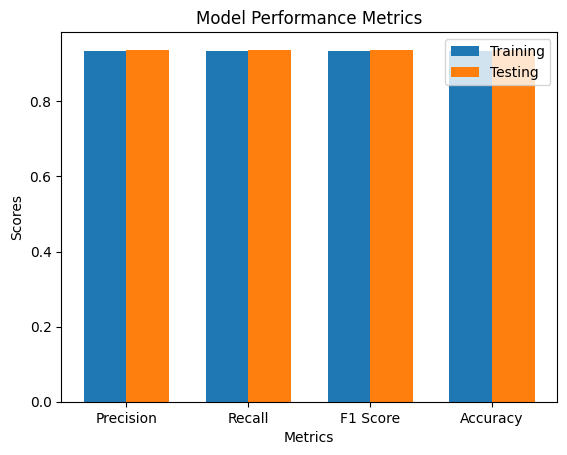

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(ytrain, sv.predict(pca_train), average='weighted')
test_precision = precision_score(ytest, sv.predict(pca_test), average='weighted')

train_recall = recall_score(ytrain, sv.predict(pca_train), average='weighted')
test_recall = recall_score(ytest, sv.predict(pca_test), average='weighted')

train_f1 = f1_score(ytrain, sv.predict(pca_train), average='weighted')
test_f1 = f1_score(ytest, sv.predict(pca_test), average='weighted')

# Calculate accuracy score on the training and testing data
train_accuracy = accuracy_score(ytrain, sv.predict(pca_train))
test_accuracy = accuracy_score(ytest, sv.predict(pca_test))

# Create lists of metric values
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_pred_test = sv.predict(pca_test)

print("Testing Classification Report:")
print(classification_report(ytest, y_pred_test))

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.93      0.95      0.94        42

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



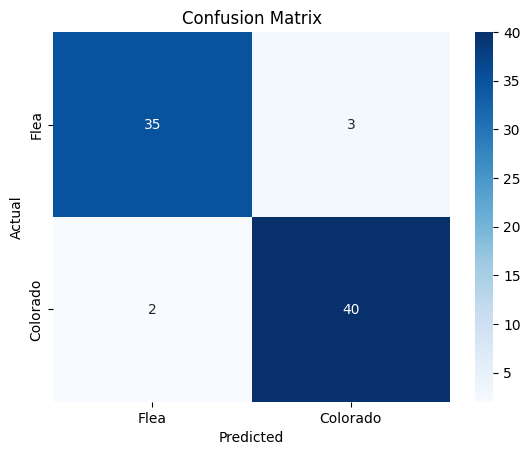

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate and visualize the confusion matrix on the testing data
cm = confusion_matrix(ytest, sv.predict(pca_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()